In [2]:
# Philippine dengue cases from 2016-2020

In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [62]:
# Load and clean data
file_path = "Philippine dengue cases from 2016-2020.xlsx"
df = pd.read_excel(file_path, sheet_name="PH dengue cases from 2016-2020")
df_clean = df.dropna()

# Display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Data shape after cleaning:", df_clean.shape)
df_clean

Data shape after cleaning: (1020, 5)


,Month,Year,Region,Dengue Cases,Dengue Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
5,June,2016,Region I,345,1
6,July,2016,Region I,1295,2
7,August,2016,Region I,1598,3
8,September,2016,Region I,1415,3
9,October,2016,Region I,1000,6


In [106]:
# Remove outliers
Q1 = df_clean['Dengue Cases'].quantile(0.25)
Q3 = df_clean['Dengue Cases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean_no_outliers = df_clean[(df_clean['Dengue Cases'] >= lower_bound) & (df_clean['Dengue Cases'] <= upper_bound)]
print("After removing outliers:", df_clean_no_outliers.shape[0])

After removing outliers: 923


In [150]:
# NumPy operations
mean_cases = np.mean(df_clean_no_outliers['Dengue Cases'])
std_deaths = np.std(df_clean_no_outliers['Dengue Deaths'])
max_cases = np.max(df_clean_no_outliers['Dengue Cases'])
sum_deaths = np.sum(df_clean_no_outliers['Dengue Deaths'])
median_cases = np.median(df_clean_no_outliers['Dengue Cases'])
print("Mean cases:", mean_cases)
print("Std deaths:", std_deaths)
print("Max cases:", max_cases)
print("Sum deaths:", sum_deaths)
print("Median cases:", median_cases)

Mean cases: 735.4160346695558
Std deaths: 101.11246774025437
Max cases: 2831
Sum deaths: 14901
Median cases: 488.0


In [342]:
# SciPy correlation between cases and deaths
corr, p_value = stats.pearsonr(df_clean_no_outliers['Dengue Cases'], df_clean_no_outliers['Dengue Deaths'])
print("Correlation between Dengue Cases and Deaths (no outliers):", corr)
print("P-value:", p_value)

Correlation between Dengue Cases and Deaths (no outliers): 0.03312886011325518
P-value: 0.3147056528536762


In [392]:
# Statsmodels regression
X = sm.add_constant(df_clean_no_outliers['Dengue Cases'])
y = df_clean_no_outliers['Dengue Deaths']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Dengue Deaths   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.012
Date:                Wed, 21 May 2025   Prob (F-statistic):              0.315
Time:                        16:26:24   Log-Likelihood:                -5570.0
No. Observations:                 923   AIC:                         1.114e+04
Df Residuals:                     921   BIC:                         1.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.5237      4.903      2.554   

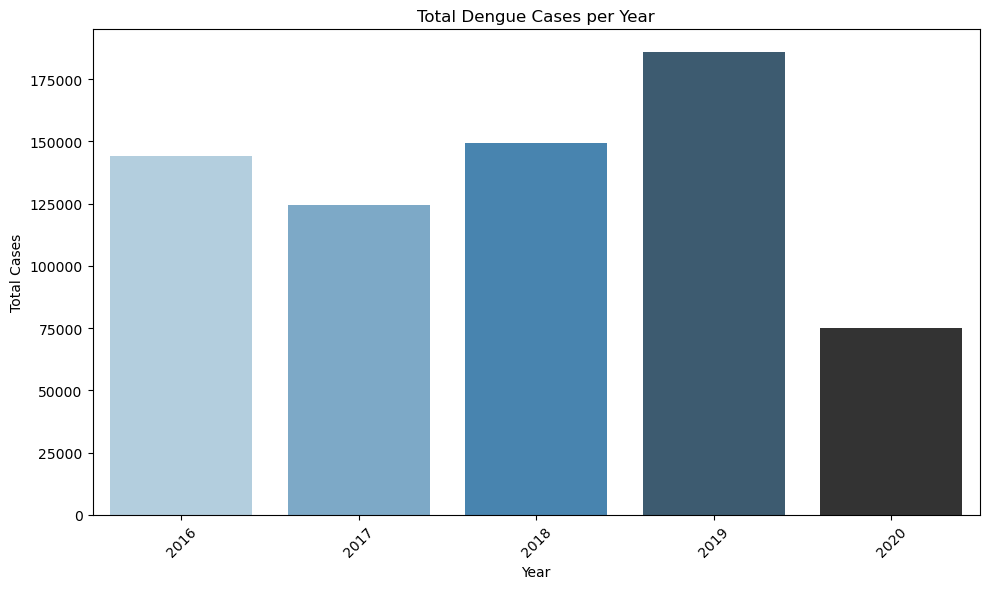

In [406]:
# Visualization 1 - Barplot of dengue cases per year
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_clean_no_outliers,
    x='Year',
    y='Dengue Cases',
    estimator=sum,
    errorbar=None,
    hue='Year',
    palette='Blues_d',
    legend=False
)
plt.title('Total Dengue Cases per Year')
plt.ylabel('Total Cases')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

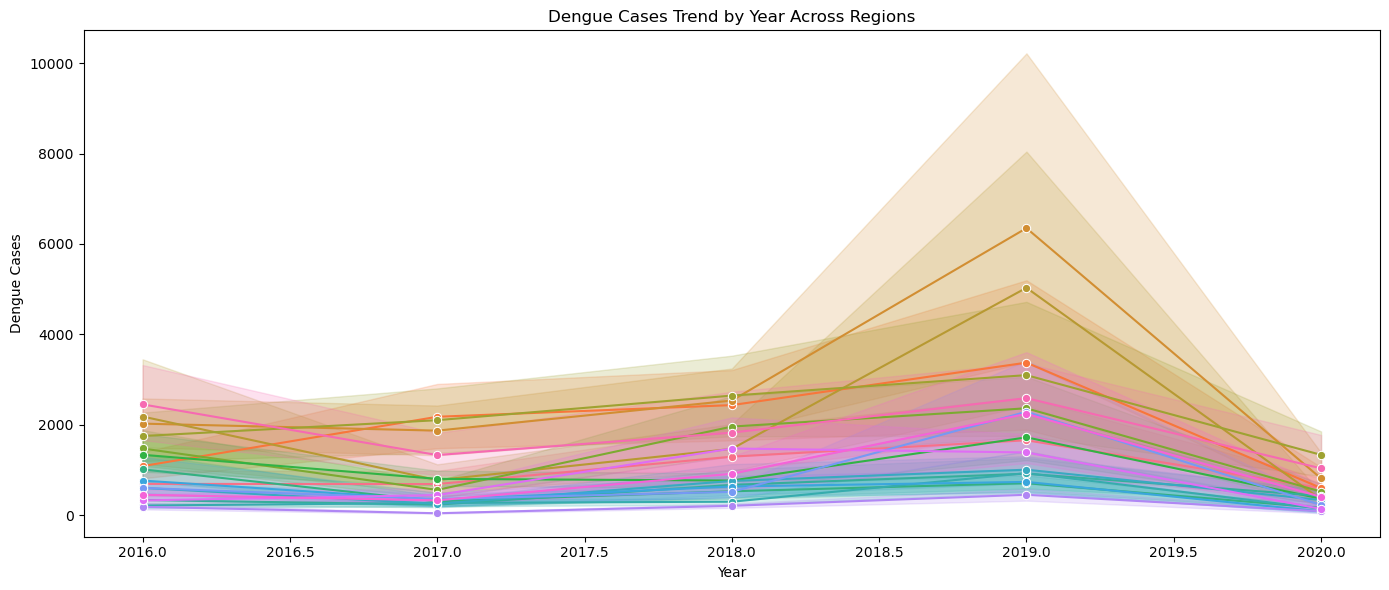

In [438]:
# Visualization 3 - Lineplot of dengue cases trend 
df_clean['Time Label'] = df_clean['Year'].astype(str) + " - " + df_clean['Region']
df_sorted = df_clean.sort_values(by='Year')
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_sorted, x='Year', y='Dengue Cases', hue='Region', marker='o', legend=False)
plt.title('Dengue Cases Trend by Year Across Regions')
plt.ylabel('Dengue Cases')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

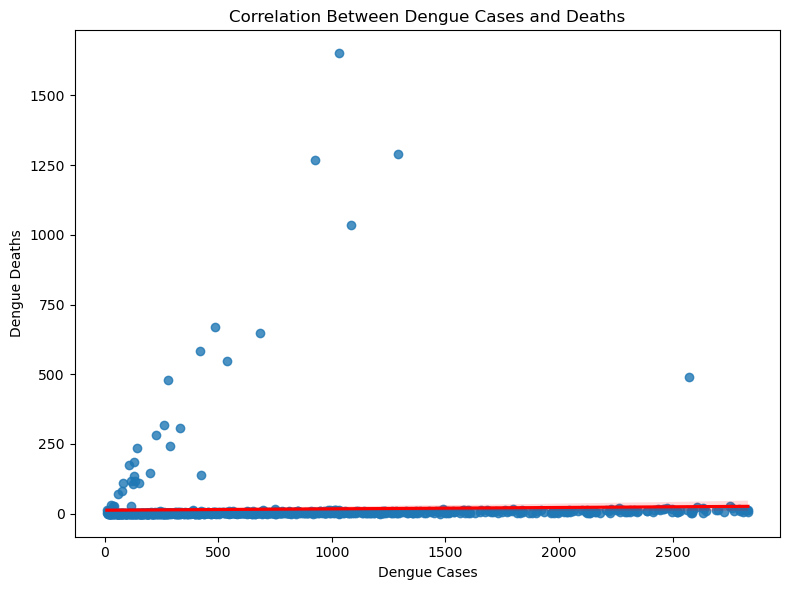

In [508]:
# Correlation plot with regression line (Cases vs. Deaths)
plt.figure(figsize=(8, 6))
sns.regplot(x='Dengue Cases', y='Dengue Deaths', data=df_clean_no_outliers, line_kws={"color": "red"})
plt.title('Correlation Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.tight_layout()
plt.show()

In [550]:
# correlation - Year vs Dengue Deaths
year_corr, year_pval = stats.pearsonr(df_clean_no_outliers['Year'], df_clean_no_outliers['Dengue Deaths'])
print(f"Correlation between Year and Dengue Deaths: {year_corr:.3f} (p = {year_pval:.3f})")


Correlation between Year and Dengue Deaths: -0.125 (p = 0.000)


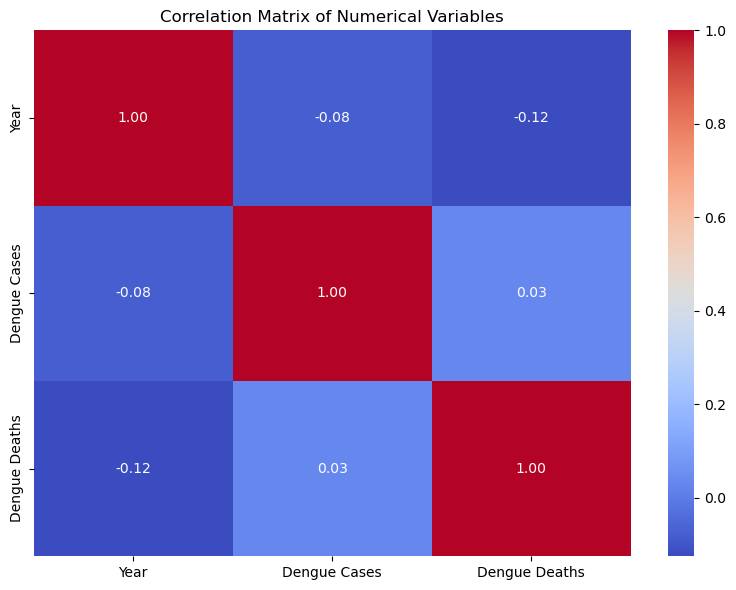

In [602]:
# Correlation Matrix to Find Strongest Correlations
plt.figure(figsize=(8, 6))
numeric_cols = df_clean_no_outliers.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()